/apps/Arch/software/PyTorch-bundle/2.1.2-foss-2023a-CUDA-12.1.1/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/apps/Arch/software/PyTorch-bundle/2.1.2-foss-2023a-CUDA-12.1.1/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7077844142913818, 'AUC': 0.7995427506891938}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7604790329933167, 'AUC': 0.8340479886794308}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8616766333580017, 'AUC': 0.9038048019767173}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.901197612285614, 'AUC': 0.9305808875510932}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8856287598609924, 'AUC': 0.9205836650740206}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8796406984329224, 'AUC': 0.9163884935485377}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.9065868258476257, 'AUC': 0.934776950069736}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.9017964005470276, 'AUC': 0.9308150230067201}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.9209581017494202, 'AUC': 0.9442070734012619}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.9305388927459717, 'AUC': 0.9513720026338027}, 'placeholder')


/apps/Arch/software/PyTorch-bundle/2.1.2-foss-2023a-CUDA-12.1.1/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/apps/Arch/software/PyTorch-bundle/2.1.2-foss-2023a-CUDA-12.1.1/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7179640531539917, 'AUC': 0.8050403315839659}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7514970302581787, 'AUC': 0.8280607172477303}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7592814564704895, 'AUC': 0.8334813447990953}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7856287360191345, 'AUC': 0.8516013581245417}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7718563079833984, 'AUC': 0.8423518861847553}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.7970060110092163, 'AUC': 0.8588404260328844}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8017964363098145, 'AUC': 0.8622295290817419}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8143712282180786, 'AUC': 0.8707133945637594}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8071856498718262, 'AUC': 0.8663720107412308}, 'placeholder')


  0%|          | 0/105 [00:00<?, ?it/s]

({'acc_avg': 0.8251497149467468, 'AUC': 0.8788336407827276}, 'placeholder')


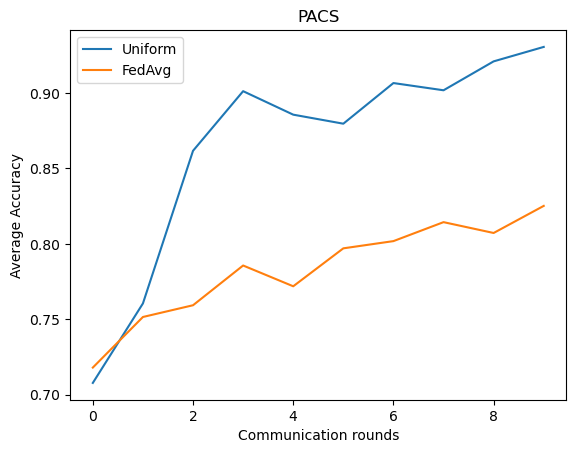

In [4]:
import time
import datetime
import gc
import argparse
import torch
import torch.cuda
import transformers
from src.server import *
from src.client import *
import src.datasets as my_datasets
# from dataclasses import dataclass
from src.splitter import *
from src.utils import *
from src.dataset_bundle import *
from wilds.common.data_loaders import get_eval_loader
from wilds import get_dataset
import matplotlib.pyplot as plt
%matplotlib inline 
import wandb
from wandb_env import WANDB_ENTITY, WANDB_PROJECT







def get_result(config_file, dataset_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    with open(config_file) as fh:
        config = json.load(fh)
        
    
    seed = 1
    set_seed(seed)
    server_method=config["server_method"]
    data_path = config['data_path']
    config['fraction']=1
    # initialize data
    if dataset_name.lower() == 'pacs':
        dataset = my_datasets.PACS(version='1.0', root_dir=config['dataset_path'], download=True)
    elif dataset_name.lower() == 'celeba':
        dataset = get_dataset(dataset="celebA", root_dir=config['dataset_path'], download=True)
    else:
        dataset = get_dataset(dataset=config["dataset"], root_dir=config['dataset_path'], download=True)
    ds_bundle = eval(config["dataset"])(dataset, probabilistic=False)
    total_subset = dataset.get_subset('train', transform=ds_bundle.train_transform)
    
    testloader = {}
    for split in dataset.split_names:
        if split != 'train':
            ds = dataset.get_subset(split, transform=ds_bundle.test_transform)
            dl = get_eval_loader(loader='standard', dataset=ds, batch_size=16)
            testloader[split] = dl
    
    
    sampler = RandomSampler(total_subset, replacement=True)
    global_dataloader = DataLoader(total_subset, batch_size=16, sampler=sampler)
    
    # num_shards = config['num_clients']
    # if num_shards == 1:
    #     training_datasets = [total_subset]
    # elif num_shards > 1:
    #     training_datasets = NonIIDSplitter(num_shards=num_shards, iid=hparam['iid'], seed=seed).split(dataset.get_subset('train'), ds_bundle.groupby_fields, transform=ds_bundle.train_transform)
    # else:
    #     raise ValueError("num_shards should be greater or equal to 1, we got {}".format(num_shards))
    
    # initialize server (model should be initialized in the server. )
    
    central_server = eval(server_method)(device, ds_bundle, config)
    acc=[]
    auc=[]
    
    N=config["num_rounds"]
    for i in range(N):
        central_server.setup_model("../models/"+str(config["dataset"].lower())+"_ERM_"+str(config["server_method"])+"_"+str(config["iid"])+"_"+str(config["imbalanced_split"])+"_"+str(i)+".pth", 0)
        central_server.register_testloader(testloader)
        #    self._split_names = {'train': 'Train', 'val': 'Validation (OOD/Trans)',
        #                            'test': 'Test (OOD/Trans)', 'id_val': 'Validation (ID/Cis)',
        #                            'id_test': 'Test (ID/Cis)'}
        res_dict, res_str=central_server.evaluate_global_model(testloader['test']) ## test on test split
        acc.append(res_dict['acc_avg']) # take the average accuracy for now. Should be changed for other datasets maybe?
        #auc.append(res_dict['AUC'])
    
    return acc#,auc
    

## still hardcoded here
dataset_name="PACS"#"celebA"#"PACS"
files = ["config.json","configfedavg.json"]
acc_res=[]
auc_res=[]
for config_file in files:
    acc=get_result(config_file, dataset_name)
    acc_res.append(acc)
    #auc_res.append(auc)
plt.xlabel("Communication rounds")
plt.ylabel("Average Accuracy")
plt.plot(acc_res[0])
plt.plot(acc_res[1])
plt.title(dataset_name)
plt.legend(["Uniform", "FedAvg"])
#plt.plot(acc_res[1])
#plt.legend(["IID", "OOD"])


In [ ]:
#print(acc['acc_avg'])
# A=[]
# for el in acc:
#     #print(el['acc_avg'])
#     A.append(el['acc_avg'])
#plt.plot(acc)